# Laboratory Work #3
## Merging DataFrames, Data Aggregation, and Data Visualization

**Objective**: To learn Pandas functions for merging, aggregating, and visualizing data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Setting the display of numbers with three decimal places
pd.set_option('display.float_format', '{:.3f}'.format)

### Task 1. Read the data file “energy_supply.xls” into the DataFrame

It is necessary to not include information from the bottom and top lines of the data file. The first two columns are unnecessary. Column labels so that they are like this:
['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable]

For all countries with missing data display value as np.NaN

In [3]:
energy_supply = pd.read_excel(
    'sources/energy-supply.xls', 
    skiprows=17, skipfooter=38, 
    usecols='C:F', 
    names=['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable'],
    na_values=['...']
)

In [4]:
energy_supply

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,321.000,10.000,78.669
1,Albania,102.000,35.000,100.000
2,Algeria,1959.000,51.000,0.551
3,American Samoa,NaN,NaN,0.641
4,Andorra,9.000,121.000,88.696
...,...,...,...,...
222,Viet Nam,2554.000,28.000,45.322
223,Wallis and Futuna Islands,0.000,26.000,0.000
224,Yemen,344.000,13.000,0.000
225,Zambia,400.000,26.000,99.715


### Task 2. Convert the data from the 'Energy Supply' column to GJ (1PJ = 1000000 GJ)

In [5]:
energy_supply['Energy Supply'] = energy_supply['Energy Supply'].multiply(10e6)

### Task 3. Rename countries that have numbers and/or parentheses in their names

For example, 'Bolivia (Plurinational State of)' should be 'Bolivia', 'Switzerland17' should be Switzerland'.

In [6]:
energy_supply = energy_supply.replace(r'\d+|\s*\(.*?\)\s*', '', regex=True)

### Task 4. Rename the following list of countries

- Republic of Korea - South Korea
- United States of America - United States
- United Kingdom of Great Britain and Northern Ireland - United Kingdom
- China, Hong Kong Special Administrative Region - Hong Kong

In [7]:
replace_dict = {
    'Republic of Korea': 'South Korea', 
    'United States of America': 'United States',
    'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
    'China, Hong Kong Special Administrative Region': 'Hong Kong'
}

energy_supply = energy_supply.replace(replace_dict)

In [8]:
energy_supply.loc[energy_supply['Country'].isin(['American Samoa', 'South Korea', 'Bolivia'])]

,Country,Energy Supply,Energy Supply per Capita,% Renewable
3,American Samoa,NaN,NaN,0.641
24,Bolivia,3360000000.000,32.000,31.477
164,South Korea,110070000000.000,221.000,2.279


### Task 5. Read GDP data from the 'gdp.csv' file, which contains World Bank data on the GDP of countries from 1960 to 2015

Do not include a header in the dataframe and rename the following list of countries:
- Korea, Rep. - South Korea
- Iran, Islamic Rep. - Iran
- Hong Kong SAR, China - Hong Kong

In [9]:
gdp = pd.read_csv('sources/gdp.csv', skiprows=4)

In [10]:
replace_dict = {
    'Korea, Rep.': 'South Korea', 
    'Iran, Islamic Rep.': 'Iran',
    'Hong Kong SAR, China': 'Hong Kong'
}

gdp = gdp.replace(replace_dict)
gdp.rename(columns={ 'Country Name': 'Country'}, inplace=True)

In [11]:
gdp.head(1)

,Country,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2467703910.615,NaN,NaN,NaN,NaN,NaN


### Task 6. Upload data from the file 'scimagojr.xlsx' which classifies countries based on their publications in journals in the field of energy engineering and energy technology

In [12]:
ranking = pd.read_excel('sources/scimagojr.xlsx')

In [13]:
ranking.head(3)

,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,1,China,127050,126767,597237,411683,4.700,138
1,2,United States,96661,94747,792274,265436,8.200,230
2,3,Japan,30504,30287,223024,61554,7.310,134


### Task 7. Join datasets
Join the three data sets from tasks 1-6 into a new data set (using the intersection of the country names). 
- Use only the last 10 years of GDP data (2006-2015) and only the top 15 countries by Scimagojr (Rank 1 to 15) 
- The index of this DataFrame should be the country name and the columns should be:
  * Rank
  * Documents
  * Citable documents
  * Citations 
  * Self-citations 
  * Citations per document
  * H index
  * Energy Supply
  * Energy Supply per Capita
  * % Renewable
  * 2006-2015 GDP data
- DataFrame should have 15 rows and 20 columns.

In [14]:
gdp = gdp[['Country','2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]

combined  = pd.merge(energy_supply, gdp, how='inner', on='Country')
countries = pd.merge(ranking, combined, how='inner', on='Country')

countries = countries.sort_values('Rank').head(15).set_index('Country')

In [15]:
countries.head(3)

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.700,138,1271910000000.000,93.000,19.755,3992331462570.890,4559041383517.930,4997775145605.960,5459247267275.140,6039658508485.590,6612490294273.650,7124977970399.610,7672447738017.420,8230120617793.520,8797998940421.279
United States,2,96661,94747,792274,265436,8.200,230,908380000000.000,286.000,11.571,14792303791800.000,15055395304800.000,15011490541400.000,14594842181900.000,14964372000000.000,15204019634600.000,15542161722300.000,15773666098800.000,16156618476000.000,16548573278300.000
Japan,3,30504,30287,223024,61554,7.310,134,189840000000.000,149.000,10.233,5496541517363.310,5617035943770.730,5558526873313.820,5251308399909.320,5498717815809.770,5473738114222.050,5569101602926.180,5644658523313.420,5642884448582.190,5669563143140.970


In [16]:
countries.shape

(15, 20)

### Task 8. Create a function to determine the average GDP of countries over the past 10 years

Function should return a Series object with 15 countries and their average GDP, sorted in descending order

In [17]:
def task_eight():
    return countries.loc[:, '2006':'2015'].mean(axis=1).sort_values(ascending=False)

In [18]:
task_eight()

Country
United States        15364344302990.000
China                 6348608932836.100
Japan                 5542207638235.176
Germany               3493025339072.848
France                2681724635761.589
United Kingdom        2487906661418.417
Brazil                2189794143774.905
Italy                 2120175089933.776
India                 1769297396603.860
Canada                1660647466307.512
Russian Federation    1565459478480.661
Spain                 1418078278145.694
Australia             1164042729991.427
South Korea           1106714508244.852
Iran                   444155754051.095
dtype: float64

### 9. Create a function to determine how much GDP has changed over the past 10 years for a country with the 5th average GDP

Function should return a tuple with the name of the country and the value by which the GDP changed.

In [19]:
def task_nine():
    name = task_eight().index[4]
    country = countries.loc[name]
    gdp_change = country.loc['2015'] - country.loc['2006']
    
    return (name, gdp_change.item())

In [20]:
task_nine()

('France', 153345695364.24023)

### 10. Create a function to determine which country has the most renewable energy installed

Function should return a tuple with the name of the country and the percentage.

In [21]:
def task_ten():
    return (countries['% Renewable'].idxmax(), countries['% Renewable'].max().item())

In [22]:
task_ten()

('Brazil', 69.64803)

### Task 11. Create a column with the population. and find the sixth country according to this assessment

Function should return a tuple with the country name and population

In [23]:
def task_eleven():
    countries['Population'] = countries['Energy Supply'] / countries['Energy Supply per Capita']
    sixth_by_population = countries.sort_values('Population', ascending=False).iloc[5]
    return (sixth_by_population.name, sixth_by_population['Population'].item())

In [24]:
task_eleven()

('Japan', 1274093959.7315435)

### Task 12. Create a column with number of cited documents per person and find a relationship between the number of cited documents per capita and energy supply per capita

Function should return a single number - correlation between 'Citable documents per Capita' and 'Energy Supply per Capita'

In [25]:
def task_twelve():
    countries['Citable documents per Capita'] = countries['Citable documents'] / countries['Population']
    return countries['Citable documents per Capita'].corr(countries['Energy Supply per Capita']).item()

In [26]:
task_twelve()

0.7940010435442943

### Task 13. Create a new column and enter 1 if the country's % Renewable is equal to or above the median for all countries, and 0 if the % Renewable is below the median

Function should return a Series whose index is the name of the country, sorted in ascending order of Rank

In [27]:
def task_thirteen():
    median = countries['% Renewable'].median()
    countries['Median renewable'] = countries['% Renewable'].apply(lambda x: 1 if x >= median else 0)
    return countries.sort_values('Rank')['Median renewable']

In [28]:
task_thirteen()

Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                1
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: Median renewable, dtype: int64

### Task 14. Use the following dictionary to group the countries by continent, then create a DataFrame that displays the sample size, sum, mean, and standard deviation of the population estimate for each country

Function should return a DataFrame with an index named Continent ['Asia', 'Australia', 'Europe', 'North America', 'South America'] and columns ['size', 'sum', 'mean ', 'std '].

In [29]:
continent_dict = {
    'China': 'Asia', 
    'United States': 'North America', 
    'Japan': 'Asia', 
    'United Kingdom': 'Europe', 
    'Russian Federation': 'Europe', 
    'Canada': 'North America', 
    'Germany': 'Europe', 
    'India': 'Asia', 
    'France': 'Europe', 
    'South Korea': 'Asia', 
    'Italy': 'Europe', 
    'Spain': 'Europe', 
    'Iran': 'Asia', 
    'Australia': 'Australia', 
    'Brazil': 'South America'
}

countries['Continent'] = pd.Series(continent_dict)

In [36]:
continents = countries.groupby('Continent')[['Population']].sum()
continents.idxmax().item()

'Asia'

In [31]:
def task_fourteen():   
    return countries.groupby('Continent')['Population'].agg(['size', 'sum', 'mean', 'std'])

In [32]:
task_fourteen()

,size,sum,mean,std
Continent,,,,
Asia,5,28986663866.106,5797332773.221,6790978883.661
Australia,1,233160173.160,233160173.160,NaN
Europe,6,4579296672.164,763216112.027,346476670.656
North America,2,3528552494.802,1764276247.401,1996696448.567
South America,1,2059152542.373,2059152542.373,NaN


### Task 15. Create a bubble chart showing the dependence of the '% Renewable' sources on the 'Rank'. 
The size of the bubble corresponds to the GDP of the countries in 2015, and the color corresponds to the 'Continent'

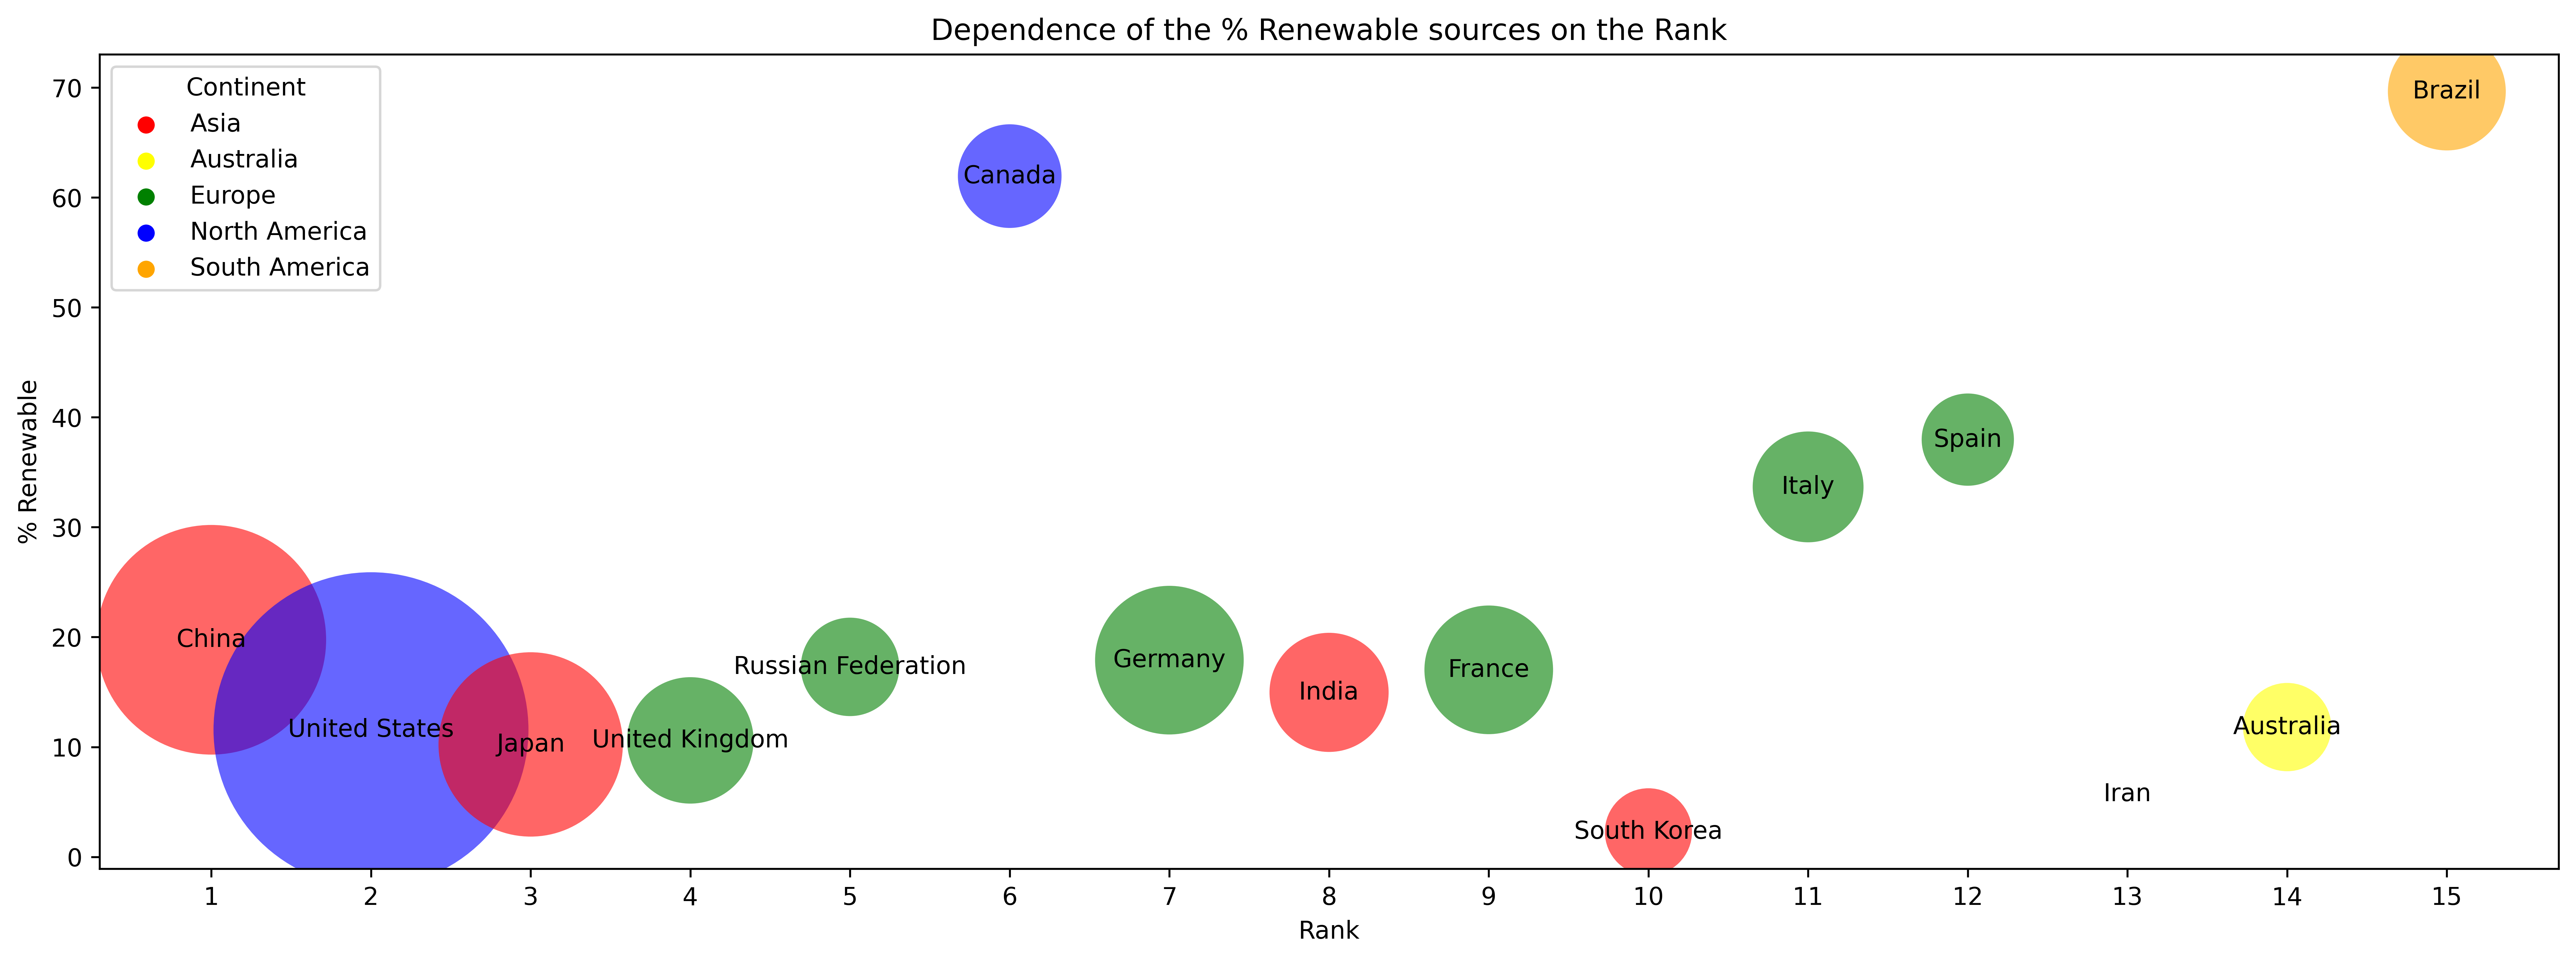

In [33]:
fig, ax = plt.subplots(figsize=(18,6), dpi=600)

continent_colors = {
    'Asia': 'red',
    'Australia': 'yellow',
    'Europe': 'green',
    'North America': 'blue',
    'South America': 'orange'
}
colors = countries['Continent'].map(continent_colors)

scatter = ax.scatter(
    x=countries['Rank'],
    y=countries['% Renewable'],
    s=countries['2015'] / 10e8,
    c=colors,
    alpha=0.6,
    linewidths=0.0
)

countries[['Rank', '% Renewable']].apply(
    lambda row: ax.text(
        row['Rank'], row['% Renewable'], countries.loc[row.name].name,
        ha='center', va='center'
    ), 
    axis=1
)

for continent, color in continent_colors.items():
    ax.scatter([], [], color=color, label=continent)

ax.legend(title='Continent')

ax.set_title('Dependence of the % Renewable sources on the Rank')
ax.set_xlabel('Rank')
ax.set_ylabel('% Renewable')
ax.set_xticks(countries['Rank'])

plt.show()